In [3]:
from brian2 import *
import matplotlib.pyplot as plt
import numpy 
from isi_tau import df as tau_isi_dataframe


# **CONTROL**

In [4]:
# Original Variables


parameters = {
    "c_m": 200 * pF,
    "g_l": 10.*nS,
    "e_l": -65.*mV,
    "v_t": -55.*mV,
    "d_t": 5.0*mV,
    "a": 2.0 * nS,
    "tau_w": 500.0*ms,
    "b": 10.0*pA,
    "v_r": -52*mV,
    "i_stim": .120*nA,
}


{0: array([0.0436, 0.0625, 0.0828, 0.1048, 0.129 , 0.1561, 0.1873, 0.2248,
       0.2736, 0.3505, 0.504 , 0.5615, 0.6718, 0.756 , 0.8908, 0.9563,
       1.1018, 1.1623, 1.2866, 1.3585, 1.5163, 1.5723, 1.6764, 1.7685,
       1.8826, 1.9629, 2.1085, 2.169 , 2.293 , 2.3651, 2.523 , 2.579 ,
       2.6829, 2.7752, 2.8888, 2.9696, 3.1139, 3.1749, 3.3016, 3.3718,
       3.5289, 3.5852, 3.6901, 3.781 , 3.8979, 3.9756]) * second}
[ 18.9  20.3  22.   24.2  27.1  31.2  37.5  48.8  76.9 153.5  57.5 110.3
  84.2 134.8  65.5 145.5  60.5 124.3  71.9 157.8  56.  104.1  92.1 114.1
  80.3 145.6  60.5 124.   72.1 157.9  56.  103.9  92.3 113.6  80.8 144.3
  61.  126.7  70.2 157.1  56.3 104.9  90.9 116.9  77.7] ms


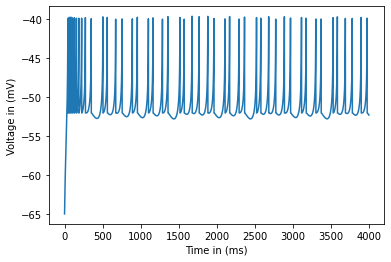

In [5]:
eqs = """
    dvm/dt = (g_l*(e_l - vm) + g_l*d_t*exp((vm-v_t)/d_t) + i_stim - w)/c_m : volt (unless refractory)
    dw/dt  = (a*(vm - e_l) - w)/tau_w : amp
    """
neuron = NeuronGroup(
    1,
    model=eqs,
    threshold="vm > -40.*mV", 
    reset="vm = v_r; w += b",
    refractory='5*ms',
    method="euler",
    namespace=parameters,
)
neuron.vm = parameters["e_l"]
neuron.w = 0
states = StateMonitor(neuron, ["vm", "w"], record=True, when="thresholds")
defaultclock.dt = 0.1 * ms
train = SpikeMonitor(neuron,record=True)
run(4000 * ms)

# clip membrane voltages to threshold (0 mV)
vms = np.clip(states[0].vm / mV, a_min=None, a_max=0)
plt.plot(states[0].t / ms, vms)

plt.xlabel('Time in (ms)')
plt.ylabel('Voltage in (mV)')
print(train.spike_trains())
difference  = numpy.diff(train.spike_trains()[0])
print(difference)
plt.show()

# **Variating the injected current**

### $0,1nA$  

In [6]:
parameters = {
    "c_m": 200 * pF,
    "g_l": 10.*nS,
    "e_l": -65.*mV,
    "v_t": -55.*mV,
    "d_t": 5.0*mV,
    "a": 2.0 * nS,
    "tau_w": 500.0*ms,
    "b": 10.0*pA,
    "v_r": -52*mV,
    "i_stim": .120*nA,
}

In [7]:
eqs = """
    dvm/dt = (g_l*(e_l - vm) + g_l*d_t*exp((vm-v_t)/d_t) + i_stim - w)/c_m : volt (unless refractory)
    dw/dt  = (a*(vm - e_l) - w)/tau_w : amp
    """
neuron = NeuronGroup(
    1,
    model=eqs,
    threshold="vm > -40.*mV", 
    reset="vm = v_r; w += b",
    refractory='5*ms',
    method="euler",
    namespace=parameters,
)
neuron.vm = parameters["e_l"]
neuron.w = 0
states = StateMonitor(neuron, ["vm", "w"], record=True, when="thresholds")
defaultclock.dt = 0.1 * ms
run(4000 * ms)
# clip membrane voltages to threshold (0 mV)
vms = np.clip(states[0].vm / mV, a_min=None, a_max=0)
plt.plot(states[0].t / ms, vms)
# plt.xlim(500,1000)
plt.xlabel('Time in (ms)')
plt.ylabel('Voltage in (mV)')
plt.figure(figsize=(10,8))
# 
plt.show()

MagicError: The magic network contains a mix of objects that has been run before and new objects, Brian does not know whether you want to start a new simulation or continue an old one. Consider explicitly creating a Network object. Also note that you can find out which objects will be included in a magic network with the collect() function.

### $0.5 nA$

In [ ]:
parameters = {
    "c_m": 200 * pF,
    "g_l": 10.*nS,
    "e_l": -65.*mV,
    "v_t": -55.*mV,
    "d_t": 5.0*mV,
    "a": 2.0 * nS,
    "tau_w": 500.0*ms,
    "b": 10.0*pA,
    "v_r": -52*mV,
    "i_stim": .025*nA,
}

In [ ]:
eqs = """
    dvm/dt = (g_l*(e_l - vm) + g_l*d_t*exp((vm-v_t)/d_t) + i_stim - w)/c_m : volt (unless refractory)
    dw/dt  = (a*(vm - e_l) - w)/tau_w : amp
    """
neuron = NeuronGroup(
    1,
    model=eqs,
    threshold="vm > -40.*mV", 
    reset="vm = v_r; w += b",
    refractory='5*ms',
    method="euler",
    namespace=parameters,
)
neuron.vm = parameters["e_l"]
neuron.w = 0
states = StateMonitor(neuron, ["vm", "w"], record=True, when="thresholds")
defaultclock.dt = 0.1 * ms
run(4000 * ms)
# clip membrane voltages to threshold (0 mV)
vms = np.clip(states[0].vm / mV, a_min=None, a_max=0)
plt.plot(states[0].t / ms, vms)
# plt.xlim(500,1000)
plt.xlabel('Time in (ms)')
plt.ylabel('Voltage in (mV)')
plt.figure(figsize=(10,8))
# 
plt.show()

### $1nA$

In [ ]:
parameters = {
    "c_m": 200 * pF,
    "g_l": 10.*nS,
    "e_l": -65.*mV,
    "v_t": -55.*mV,
    "d_t": 5.0*mV,
    "a": 2.0 * nS,
    "tau_w": 500.0*ms,
    "b": 10.0*pA,
    "v_r": -52*mV,
    "i_stim": 1*nA,
}

In [ ]:
eqs = """
    dvm/dt = (g_l*(e_l - vm) + g_l*d_t*exp((vm-v_t)/d_t) + i_stim - w)/c_m : volt (unless refractory)
    dw/dt  = (a*(vm - e_l) - w)/tau_w : amp
    """
neuron = NeuronGroup(
    1,
    model=eqs,
    threshold="vm > -40.*mV", 
    reset="vm = v_r; w += b",
    refractory='5*ms',
    method="euler",
    namespace=parameters,
)
neuron.vm = parameters["e_l"]
neuron.w = 0
states = StateMonitor(neuron, ["vm", "w"], record=True, when="thresholds")
defaultclock.dt = 0.1 * ms
run(4000 * ms)
# clip membrane voltages to threshold (0 mV)
vms = np.clip(states[0].vm / mV, a_min=None, a_max=0)
plt.plot(states[0].t / ms, vms)

plt.xlabel('Time in (ms)')
plt.ylabel('Voltage in (mV)')

plt.show()

### $5 nA$

In [ ]:
parameters = {
    "c_m": 200 * pF,
    "g_l": 10.*nS,
    "e_l": -65.*mV,
    "v_t": -55.*mV,
    "d_t": 5.0*mV,
    "a": 2.0 * nS,
    "tau_w": 500.0*ms,
    "b": 10.0*pA,
    "v_r": -52*mV,
    "i_stim": 5*nA,
}

In [ ]:
eqs = """
    dvm/dt = (g_l*(e_l - vm) + g_l*d_t*exp((vm-v_t)/d_t) + i_stim - w)/c_m : volt (unless refractory)
    dw/dt  = (a*(vm - e_l) - w)/tau_w : amp
    """
neuron = NeuronGroup(
    1,
    model=eqs,
    threshold="vm > -40.*mV", 
    reset="vm = v_r; w += b",
    refractory='5*ms',
    method="euler",
    namespace=parameters,
)
neuron.vm = parameters["e_l"]
neuron.w = 0
states = StateMonitor(neuron, ["vm", "w"], record=True, when="thresholds")
defaultclock.dt = 0.1 * ms
run(4000 * ms)
# clip membrane voltages to threshold (0 mV)
vms = np.clip(states[0].vm / mV, a_min=None, a_max=0)
plt.plot(states[0].t / ms, vms)

plt.xlabel('Time in (ms)')
plt.ylabel('Voltage in (mV)')

plt.show()

### $10 nA$

In [ ]:
parameters = {
    "c_m": 200 * pF,
    "g_l": 10.*nS,
    "e_l": -65.*mV,
    "v_t": -55.*mV,
    "d_t": 5.0*mV,
    "a": 2.0 * nS,
    "tau_w": 500.0*ms,
    "b": 10.0*pA,
    "v_r": -52*mV,
    "i_stim": 10*nA,
}

In [ ]:
eqs = """
    dvm/dt = (g_l*(e_l - vm) + g_l*d_t*exp((vm-v_t)/d_t) + i_stim - w)/c_m : volt (unless refractory)
    dw/dt  = (a*(vm - e_l) - w)/tau_w : amp
    """
neuron = NeuronGroup(
    1,
    model=eqs,
    threshold="vm > -40.*mV", 
    reset="vm = v_r; w += b",
    refractory='5*ms',
    method="euler",
    namespace=parameters,
)
neuron.vm = parameters["e_l"]
neuron.w = 0
states = StateMonitor(neuron, ["vm", "w"], record=True, when="thresholds")
defaultclock.dt = 0.1 * ms
run(4000 * ms)
# clip membrane voltages to threshold (0 mV)
vms = np.clip(states[0].vm / mV, a_min=None, a_max=0)
plt.plot(states[0].t / ms, vms)

plt.xlabel('Time in (ms)')
plt.ylabel('Voltage in (mV)')

plt.show()

# **Variating values of $a$**

### $1nS$

In [ ]:
parameters = {
    "c_m": 200 * pF,
    "g_l": 10.*nS,
    "e_l": -65.*mV,
    "v_t": -55.*mV,
    "d_t": 5.0*mV,
    "a": 1.0 * nS,
    "tau_w": 500.0*ms,
    "b": 10.0*pA,
    "v_r": -52*mV,
    "i_stim": .120*nA,
}

In [ ]:
eqs = """
    dvm/dt = (g_l*(e_l - vm) + g_l*d_t*exp((vm-v_t)/d_t) + i_stim - w)/c_m : volt (unless refractory)
    dw/dt  = (a*(vm - e_l) - w)/tau_w : amp
    """
neuron = NeuronGroup(
    1,
    model=eqs,
    threshold="vm > -40.*mV", 
    reset="vm = v_r; w += b",
    refractory='5*ms',
    method="euler",
    namespace=parameters,
)
neuron.vm = parameters["e_l"]
neuron.w = 0
states = StateMonitor(neuron, ["vm", "w"], record=True, when="thresholds")
defaultclock.dt = 0.1 * ms
run(4000 * ms)
# clip membrane voltages to threshold (0 mV)
vms = np.clip(states[0].vm / mV, a_min=None, a_max=0)
plt.plot(states[0].t / ms, vms)

plt.xlabel('Time in (ms)')
plt.ylabel('Voltage in (mV)')

plt.show()

### $2nS$

In [ ]:

parameters = {
    "c_m": 200 * pF,
    "g_l": 10.*nS,
    "e_l": -65.*mV,
    "v_t": -55.*mV,
    "d_t": 5.0*mV,
    "a": 2.0 * nS,
    "tau_w": 500.0*ms,
    "b": 10.0*pA,
    "v_r": -52*mV,
    "i_stim": .120*nA,
}

In [ ]:
eqs = """
    dvm/dt = (g_l*(e_l - vm) + g_l*d_t*exp((vm-v_t)/d_t) + i_stim - w)/c_m : volt (unless refractory)
    dw/dt  = (a*(vm - e_l) - w)/tau_w : amp
    """
neuron = NeuronGroup(
    1,
    model=eqs,
    threshold="vm > -40.*mV", 
    reset="vm = v_r; w += b",
    refractory='5*ms',
    method="euler",
    namespace=parameters,
)
neuron.vm = parameters["e_l"]
neuron.w = 0
states = StateMonitor(neuron, ["vm", "w"], record=True, when="thresholds")
defaultclock.dt = 0.1 * ms
run(4000 * ms)
# clip membrane voltages to threshold (0 mV)
vms = np.clip(states[0].vm / mV, a_min=None, a_max=0)
plt.plot(states[0].t / ms, vms)

plt.xlabel('Time in (ms)')
plt.ylabel('Voltage in (mV)')

plt.show()

### $5nS$

In [ ]:

parameters = {
    "c_m": 200 * pF,
    "g_l": 10.*nS,
    "e_l": -65.*mV,
    "v_t": -55.*mV,
    "d_t": 5.0*mV,
    "a": 5.0 * nS,
    "tau_w": 500.0*ms,
    "b": 10.0*pA,
    "v_r": -52*mV,
    "i_stim": .120*nA,
}

In [ ]:
eqs = """
    dvm/dt = (g_l*(e_l - vm) + g_l*d_t*exp((vm-v_t)/d_t) + i_stim - w)/c_m : volt (unless refractory)
    dw/dt  = (a*(vm - e_l) - w)/tau_w : amp
    """
neuron = NeuronGroup(
    1,
    model=eqs,
    threshold="vm > -40.*mV", 
    reset="vm = v_r; w += b",
    refractory='5*ms',
    method="euler",
    namespace=parameters,
)
neuron.vm = parameters["e_l"]
neuron.w = 0
states = StateMonitor(neuron, ["vm", "w"], record=True, when="thresholds")
defaultclock.dt = 0.1 * ms
run(4000 * ms)
# clip membrane voltages to threshold (0 mV)
vms = np.clip(states[0].vm / mV, a_min=None, a_max=0)
plt.plot(states[0].t / ms, vms)

plt.xlabel('Time in (ms)')
plt.ylabel('Voltage in (mV)')

plt.show()

### $10nS$

In [ ]:
parameters = {
    "c_m": 200 * pF,
    "g_l": 10.*nS,
    "e_l": -65.*mV,
    "v_t": -55.*mV,
    "d_t": 5.0*mV,
    "a": 10.0 * nS,
    "tau_w": 500.0*ms,
    "b": 10.0*pA,
    "v_r": -52*mV,
    "i_stim": .120*nA,
}

In [ ]:
eqs = """
    dvm/dt = (g_l*(e_l - vm) + g_l*d_t*exp((vm-v_t)/d_t) + i_stim - w)/c_m : volt (unless refractory)
    dw/dt  = (a*(vm - e_l) - w)/tau_w : amp
    """
neuron = NeuronGroup(
    1,
    model=eqs,
    threshold="vm > -40.*mV", 
    reset="vm = v_r; w += b",
    refractory='5*ms',
    method="euler",
    namespace=parameters,
)
neuron.vm = parameters["e_l"]
neuron.w = 0
states = StateMonitor(neuron, ["vm", "w"], record=True, when="thresholds")
defaultclock.dt = 0.1 * ms
run(4000 * ms)
# clip membrane voltages to threshold (0 mV)
vms = np.clip(states[0].vm / mV, a_min=None, a_max=0)
plt.plot(states[0].t / ms, vms)

plt.xlabel('Time in (ms)')
plt.ylabel('Voltage in (mV)')

plt.show()

## **Variating the value of $b$**

### $1pA$

In [ ]:
parameters = {
    "c_m": 200 * pF,
    "g_l": 10.*nS,
    "e_l": -65.*mV,
    "v_t": -55.*mV,
    "d_t": 5.0*mV,
    "a": 2.0 * nS,
    "tau_w": 500.0*ms,
    "b": 1.0*pA,
    "v_r": -52*mV,
    "i_stim": .120*nA,
}

In [ ]:
eqs = """
    dvm/dt = (g_l*(e_l - vm) + g_l*d_t*exp((vm-v_t)/d_t) + i_stim - w)/c_m : volt (unless refractory)
    dw/dt  = (a*(vm - e_l) - w)/tau_w : amp
    """
neuron = NeuronGroup(
    1,
    model=eqs,
    threshold="vm > -40.*mV", 
    reset="vm = v_r; w += b",
    refractory='5*ms',
    method="euler",
    namespace=parameters,
)
neuron.vm = parameters["e_l"]
neuron.w = 0
states = StateMonitor(neuron, ["vm", "w"], record=True, when="thresholds")
defaultclock.dt = 0.1 * ms
run(4000 * ms)
# clip membrane voltages to threshold (0 mV)
vms = np.clip(states[0].vm / mV, a_min=None, a_max=0)
plt.plot(states[0].t / ms, vms)

plt.xlabel('Time in (ms)')
plt.ylabel('Voltage in (mV)')

plt.show()

### $5pA$

In [ ]:
parameters = {
    "c_m": 200 * pF,
    "g_l": 10.*nS,
    "e_l": -65.*mV,
    "v_t": -55.*mV,
    "d_t": 5.0*mV,
    "a": 2.0 * nS,
    "tau_w": 500.0*ms,
    "b": 5.0*pA,
    "v_r": -52*mV,
    "i_stim": .120*nA,
}

In [ ]:
eqs = """
    dvm/dt = (g_l*(e_l - vm) + g_l*d_t*exp((vm-v_t)/d_t) + i_stim - w)/c_m : volt (unless refractory)
    dw/dt  = (a*(vm - e_l) - w)/tau_w : amp
    """
neuron = NeuronGroup(
    1,
    model=eqs,
    threshold="vm > -40.*mV", 
    reset="vm = v_r; w += b",
    refractory='5*ms',
    method="euler",
    namespace=parameters,
)
neuron.vm = parameters["e_l"]
neuron.w = 0
states = StateMonitor(neuron, ["vm", "w"], record=True, when="thresholds")
defaultclock.dt = 0.1 * ms
run(4000 * ms)
# clip membrane voltages to threshold (0 mV)
vms = np.clip(states[0].vm / mV, a_min=None, a_max=0)
plt.plot(states[0].t / ms, vms)

plt.xlabel('Time in (ms)')
plt.ylabel('Voltage in (mV)')

plt.show()

### Control $10pA$

In [ ]:
parameters = {
    "c_m": 200 * pF,
    "g_l": 10.*nS,
    "e_l": -65.*mV,
    "v_t": -55.*mV,
    "d_t": 5.0*mV,
    "a": 2.0 * nS,
    "tau_w": 500.0*ms,
    "b": 10.0*pA,
    "v_r": -52*mV,
    "i_stim": .120*nA,
}

In [ ]:
eqs = """
    dvm/dt = (g_l*(e_l - vm) + g_l*d_t*exp((vm-v_t)/d_t) + i_stim - w)/c_m : volt (unless refractory)
    dw/dt  = (a*(vm - e_l) - w)/tau_w : amp
    """
neuron = NeuronGroup(
    1,
    model=eqs,
    threshold="vm > -40.*mV", 
    reset="vm = v_r; w += b",
    refractory='5*ms',
    method="euler",
    namespace=parameters,
)
neuron.vm = parameters["e_l"]
neuron.w = 0
states = StateMonitor(neuron, ["vm", "w"], record=True, when="thresholds")
defaultclock.dt = 0.1 * ms
run(4000 * ms)
# clip membrane voltages to threshold (0 mV)
vms = np.clip(states[0].vm / mV, a_min=None, a_max=0)
plt.plot(states[0].t / ms, vms)

plt.xlabel('Time in (ms)')
plt.ylabel('Voltage in (mV)')

plt.show()

### $15pA$

In [ ]:
parameters = {
    "c_m": 200 * pF,
    "g_l": 10.*nS,
    "e_l": -65.*mV,
    "v_t": -55.*mV,
    "d_t": 5.0*mV,
    "a": 2.0 * nS,
    "tau_w": 500.0*ms,
    "b": 15.0*pA,
    "v_r": -52*mV,
    "i_stim": .120*nA,
}

In [ ]:
eqs = """
    dvm/dt = (g_l*(e_l - vm) + g_l*d_t*exp((vm-v_t)/d_t) + i_stim - w)/c_m : volt (unless refractory)
    dw/dt  = (a*(vm - e_l) - w)/tau_w : amp
    """
neuron = NeuronGroup(
    1,
    model=eqs,
    threshold="vm > -40.*mV", 
    reset="vm = v_r; w += b",
    refractory='5*ms',
    method="euler",
    namespace=parameters,
)
neuron.vm = parameters["e_l"]
neuron.w = 0
states = StateMonitor(neuron, ["vm", "w"], record=True, when="thresholds")
defaultclock.dt = 0.1 * ms
run(4000 * ms)
# clip membrane voltages to threshold (0 mV)
vms = np.clip(states[0].vm / mV, a_min=None, a_max=0)
plt.plot(states[0].t / ms, vms)

plt.xlabel('Time in (ms)')
plt.ylabel('Voltage in (mV)')

plt.show()

### $20pA$

In [ ]:
parameters = {
    "c_m": 200 * pF,
    "g_l": 10.*nS,
    "e_l": -65.*mV,
    "v_t": -55.*mV,
    "d_t": 5.0*mV,
    "a": 2.0 * nS,
    "tau_w": 500.0*ms,
    "b": 20.0*pA,
    "v_r": -52*mV,
    "i_stim": .120*nA,
}

In [ ]:
eqs = """
    dvm/dt = (g_l*(e_l - vm) + g_l*d_t*exp((vm-v_t)/d_t) + i_stim - w)/c_m : volt (unless refractory)
    dw/dt  = (a*(vm - e_l) - w)/tau_w : amp
    """
neuron = NeuronGroup(
    1,
    model=eqs,
    threshold="vm > -40.*mV", 
    reset="vm = v_r; w += b",
    refractory='5*ms',
    method="euler",
    namespace=parameters,
)
neuron.vm = parameters["e_l"]
neuron.w = 0
states = StateMonitor(neuron, ["vm", "w"], record=True, when="thresholds")
defaultclock.dt = 0.1 * ms
run(4000 * ms)
# clip membrane voltages to threshold (0 mV)
vms = np.clip(states[0].vm / mV, a_min=None, a_max=0)
plt.plot(states[0].t / ms, vms)

plt.xlabel('Time in (ms)')
plt.ylabel('Voltage in (mV)')

plt.show()

# **Variatung values $tau$**

### $200ms$

In [ ]:
parameters = {
    "c_m": 200 * pF,
    "g_l": 10.*nS,
    "e_l": -65.*mV,
    "v_t": -55.*mV,
    "d_t": 5.0*mV,
    "a": 2.0 * nS,
    "tau_w": 200.0*ms,
    "b": 10.0*pA,
    "v_r": -52*mV,
    "i_stim": .120*nA,
}

In [ ]:
eqs = """
    dvm/dt = (g_l*(e_l - vm) + g_l*d_t*exp((vm-v_t)/d_t) + i_stim - w)/c_m : volt (unless refractory)
    dw/dt  = (a*(vm - e_l) - w)/tau_w : amp
    """
neuron = NeuronGroup(
    1,
    model=eqs,
    threshold="vm > -40.*mV", 
    reset="vm = v_r; w += b",
    refractory='5*ms',
    method="euler",
    namespace=parameters,
)
neuron.vm = parameters["e_l"]
neuron.w = 0
states = StateMonitor(neuron, ["vm", "w"], record=True, when="thresholds")
defaultclock.dt = 0.1 * ms
run(4000 * ms)
# clip membrane voltages to threshold (0 mV)
vms = np.clip(states[0].vm / mV, a_min=None, a_max=0)
plt.plot(states[0].t / ms, vms)

plt.xlabel('Time in (ms)')
plt.ylabel('Voltage in (mV)')

plt.show()

### $300ms$

In [ ]:
parameters = {
    "c_m": 200 * pF,
    "g_l": 10.*nS,
    "e_l": -65.*mV,
    "v_t": -55.*mV,
    "d_t": 5.0*mV,
    "a": 2.0 * nS,
    "tau_w": 300.0*ms,
    "b": 10.0*pA,
    "v_r": -52*mV,
    "i_stim": .120*nA,
}

In [ ]:
eqs = """
    dvm/dt = (g_l*(e_l - vm) + g_l*d_t*exp((vm-v_t)/d_t) + i_stim - w)/c_m : volt (unless refractory)
    dw/dt  = (a*(vm - e_l) - w)/tau_w : amp
    """
neuron = NeuronGroup(
    1,
    model=eqs,
    threshold="vm > -40.*mV", 
    reset="vm = v_r; w += b",
    refractory='5*ms',
    method="euler",
    namespace=parameters,
)
neuron.vm = parameters["e_l"]
neuron.w = 0
states = StateMonitor(neuron, ["vm", "w"], record=True, when="thresholds")
defaultclock.dt = 0.1 * ms
run(4000 * ms)
# clip membrane voltages to threshold (0 mV)
vms = np.clip(states[0].vm / mV, a_min=None, a_max=0)
plt.plot(states[0].t / ms, vms)

plt.xlabel('Time in (ms)')
plt.ylabel('Voltage in (mV)')

plt.show()

### $400ms$

In [ ]:
parameters = {
    "c_m": 200 * pF,
    "g_l": 10.*nS,
    "e_l": -65.*mV,
    "v_t": -55.*mV,
    "d_t": 5.0*mV,
    "a": 2.0 * nS,
    "tau_w": 400.0*ms,
    "b": 10.0*pA,
    "v_r": -52*mV,
    "i_stim": .120*nA,
}

In [ ]:
eqs = """
    dvm/dt = (g_l*(e_l - vm) + g_l*d_t*exp((vm-v_t)/d_t) + i_stim - w)/c_m : volt (unless refractory)
    dw/dt  = (a*(vm - e_l) - w)/tau_w : amp
    """
neuron = NeuronGroup(
    1,
    model=eqs,
    threshold="vm > -40.*mV", 
    reset="vm = v_r; w += b",
    refractory='5*ms',
    method="euler",
    namespace=parameters,
)
neuron.vm = parameters["e_l"]
neuron.w = 0
states = StateMonitor(neuron, ["vm", "w"], record=True, when="thresholds")
defaultclock.dt = 0.1 * ms
run(4000 * ms)
# clip membrane voltages to threshold (0 mV)
vms = np.clip(states[0].vm / mV, a_min=None, a_max=0)
plt.plot(states[0].t / ms, vms)

plt.xlabel('Time in (ms)')
plt.ylabel('Voltage in (mV)')

plt.show()

### $500ms$

In [ ]:
parameters = {
    "c_m": 200 * pF,
    "g_l": 10.*nS,
    "e_l": -65.*mV,
    "v_t": -55.*mV,
    "d_t": 5.0*mV,
    "a": 2.0 * nS,
    "tau_w": 500.0*ms,
    "b": 10.0*pA,
    "v_r": -52*mV,
    "i_stim": .120*nA,
}

In [ ]:
eqs = """
    dvm/dt = (g_l*(e_l - vm) + g_l*d_t*exp((vm-v_t)/d_t) + i_stim - w)/c_m : volt (unless refractory)
    dw/dt  = (a*(vm - e_l) - w)/tau_w : amp
    """
neuron = NeuronGroup(
    1,
    model=eqs,
    threshold="vm > -40.*mV", 
    reset="vm = v_r; w += b",
    refractory='5*ms',
    method="euler",
    namespace=parameters,
)
neuron.vm = parameters["e_l"]
neuron.w = 0
states = StateMonitor(neuron, ["vm", "w"], record=True, when="thresholds")
defaultclock.dt = 0.1 * ms
run(4000 * ms)
# clip membrane voltages to threshold (0 mV)
vms = np.clip(states[0].vm / mV, a_min=None, a_max=0)
plt.plot(states[0].t / ms, vms)

plt.xlabel('Time in (ms)')
plt.ylabel('Voltage in (mV)')

plt.show()

### $600ms$

In [ ]:
parameters = {
    "c_m": 200 * pF,
    "g_l": 10.*nS,
    "e_l": -65.*mV,
    "v_t": -55.*mV,
    "d_t": 5.0*mV,
    "a": 2.0 * nS,
    "tau_w": 600.0*ms,
    "b": 10.0*pA,
    "v_r": -52*mV,
    "i_stim": .120*nA,
}

In [ ]:
eqs = """
    dvm/dt = (g_l*(e_l - vm) + g_l*d_t*exp((vm-v_t)/d_t) + i_stim - w)/c_m : volt (unless refractory)
    dw/dt  = (a*(vm - e_l) - w)/tau_w : amp
    """
neuron = NeuronGroup(
    1,
    model=eqs,
    threshold="vm > -40.*mV", 
    reset="vm = v_r; w += b",
    refractory='5*ms',
    method="euler",
    namespace=parameters,
)
neuron.vm = parameters["e_l"]
neuron.w = 0
states = StateMonitor(neuron, ["vm", "w"], record=True, when="thresholds")
defaultclock.dt = 0.1 * ms
run(4000 * ms)
# clip membrane voltages to threshold (0 mV)
vms = np.clip(states[0].vm / mV, a_min=None, a_max=0)
plt.plot(states[0].t / ms, vms)

plt.xlabel('Time in (ms)')
plt.ylabel('Voltage in (mV)')

plt.show()

### $700ms$

In [ ]:
parameters = {
    "c_m": 200 * pF,
    "g_l": 10.*nS,
    "e_l": -65.*mV,
    "v_t": -55.*mV,
    "d_t": 5.0*mV,
    "a": 2.0 * nS,
    "tau_w": 700.0*ms,
    "b": 10.0*pA,
    "v_r": -52*mV,
    "i_stim": .120*nA,
}

In [ ]:
eqs = """
    dvm/dt = (g_l*(e_l - vm) + g_l*d_t*exp((vm-v_t)/d_t) + i_stim - w)/c_m : volt (unless refractory)
    dw/dt  = (a*(vm - e_l) - w)/tau_w : amp
    """
neuron = NeuronGroup(
    1,
    model=eqs,
    threshold="vm > -40.*mV", 
    reset="vm = v_r; w += b",
    refractory='5*ms',
    method="euler",
    namespace=parameters,
)
neuron.vm = parameters["e_l"]
neuron.w = 0
states = StateMonitor(neuron, ["vm", "w"], record=True, when="thresholds")
defaultclock.dt = 0.1 * ms
run(4000 * ms)
# clip membrane voltages to threshold (0 mV)
vms = np.clip(states[0].vm / mV, a_min=None, a_max=0)
plt.plot(states[0].t / ms, vms)

plt.xlabel('Time in (ms)')
plt.ylabel('Voltage in (mV)')

plt.show()

### $800ms$

In [ ]:
parameters = {
    "c_m": 200 * pF,
    "g_l": 10.*nS,
    "e_l": -65.*mV,
    "v_t": -55.*mV,
    "d_t": 5.0*mV,
    "a": 2.0 * nS,
    "tau_w": 800.0*ms,
    "b": 10.0*pA,
    "v_r": -52*mV,
    "i_stim": .120*nA,
}

In [ ]:
eqs = """
    dvm/dt = (g_l*(e_l - vm) + g_l*d_t*exp((vm-v_t)/d_t) + i_stim - w)/c_m : volt (unless refractory)
    dw/dt  = (a*(vm - e_l) - w)/tau_w : amp
    """
neuron = NeuronGroup(
    1,
    model=eqs,
    threshold="vm > -40.*mV", 
    reset="vm = v_r; w += b",
    refractory='5*ms',
    method="euler",
    namespace=parameters,
)
neuron.vm = parameters["e_l"]
neuron.w = 0
states = StateMonitor(neuron, ["vm", "w"], record=True, when="thresholds")
defaultclock.dt = 0.1 * ms
run(4000 * ms)
# clip membrane voltages to threshold (0 mV)
vms = np.clip(states[0].vm / mV, a_min=None, a_max=0)
plt.plot(states[0].t / ms, vms)

plt.xlabel('Time in (ms)')
plt.ylabel('Voltage in (mV)')

plt.show()

### $1000ms$

In [ ]:
parameters = {
    "c_m": 200 * pF,
    "g_l": 10.*nS,
    "e_l": -65.*mV,
    "v_t": -55.*mV,
    "d_t": 5.0*mV,
    "a": 2.0 * nS,
    "tau_w": 1000.0*ms,
    "b": 10.0*pA,
    "v_r": -52*mV,
    "i_stim": .120*nA,
}

In [ ]:
eqs = """
    dvm/dt = (g_l*(e_l - vm) + g_l*d_t*exp((vm-v_t)/d_t) + i_stim - w)/c_m : volt (unless refractory)
    dw/dt  = (a*(vm - e_l) - w)/tau_w : amp
    """
neuron = NeuronGroup(
    1,
    model=eqs,
    threshold="vm > -40.*mV", 
    reset="vm = v_r; w += b",
    refractory='5*ms',
    method="euler",
    namespace=parameters,
)
neuron.vm = parameters["e_l"]
neuron.w = 0
states = StateMonitor(neuron, ["vm", "w"], record=True, when="thresholds")
defaultclock.dt = 0.1 * ms
run(4000 * ms)
# clip membrane voltages to threshold (0 mV)
vms = np.clip(states[0].vm / mV, a_min=None, a_max=0)
plt.plot(states[0].t / ms, vms)

plt.xlabel('Time in (ms)')
plt.ylabel('Voltage in (mV)')

plt.show()

In [ ]:
plt.title("Change in inter spike interval by time")
plt.xlabel('Variation of I (nA)')
plt.ylabel('Inter Spike Interval')
plt.scatter(data=tau_isi_dataframe, x='variable', y='isi')
plt.show()
